In [17]:
import numpy as np
from numpy.linalg import multi_dot
from numpy.linalg import qr
import numpy.linalg as npla
import scipy as sp
from scipy.linalg import block_diag, logm, eigvals
from multiprocessing import Pool
from functools import partial
import multiprocessing as mp
from multiprocessing import set_start_method
from multiprocessing import get_context
import matplotlib.pyplot as plt
import time
from scipy.linalg import lu

from NodeReplacementFunctions import *

#The functions from NodeReplacementFunctions.py are

#TAMatrix
#TBMatrix
#TAR_Matrix
#TBR_Matrix
#TAS
#TBS
#FullStrip
#FullTransfer

#The only one were actually going to call is FullTransfer which constructs a matrix strip
#given the probabilities that we will define

In [24]:
#constructs lists of probabilties in sizestrip_length x strip_width
# We dont turn this into a function becasue we want to vary theta while keeping the same phases
# This allows us to construct a network model before we 
strip_length = 1000
strip_width = 16
probability_cutoff = 1


#ignore these these are all important to getting it running
TA_prob = [np.random.random_sample(strip_width) for i in range(strip_length)]
TB_prob = [np.random.random_sample(strip_width) for i in range(strip_length)]

#first we need to know how many replaced nodes there will be
#this says how many nodes will be replaced per strip
num_of_replaced_A_nodes = [sum([x > probability_cutoff for x in row]) for row in TA_prob]
num_of_replaced_B_nodes = [sum([x > probability_cutoff for x in row]) for row in TB_prob]

#creates the phases necessary for the regular nodes
TAphases = [[(2*np.pi)*np.random.random_sample(3) for i in range(strip_width - num_of_replaced_A_nodes[j])] for j in range(strip_length)]
TBphases = [[(2*np.pi)*np.random.random_sample(3) for i in range(strip_width - num_of_replaced_B_nodes[j])] for j in range(strip_length)]

#creates the phases for replacement nodes note it is range(5) because there are 5 normal nodes to construct a replacement node
TAReplace_phases  = [[[(2*np.pi)*np.random.random_sample(3) for i in range(5)] for i in range(num_of_replaced_A_nodes[j])] for j in range(strip_length)]
TBReplace_phases  = [[[(2*np.pi)*np.random.random_sample(3) for i in range(5)] for i in range(num_of_replaced_B_nodes[j])] for j in range(strip_length)]


phases = [TAphases,TBphases, TAReplace_phases, TBReplace_phases]
replacement_num = [num_of_replaced_A_nodes, num_of_replaced_B_nodes]
probabilties = [TA_prob, TB_prob]



theta_start = np.pi/10
theta_end = np.pi/2.1
theta_amount = 15

#theta values
theta_list = np.linspace(theta_start,theta_end,theta_amount)

start_time = time.time()
partial_func = partial(FullTransfer,probabilties, strip_length,strip_width,probability_cutoff,phases, replacement_num)
p = get_context("spawn").Pool()

#using multiple cores here
final_array= p.map(partial_func, theta_list)


np.save('final_array.npy',final_array)
#file1 = open("RunLog.txt","w")
L = ["strip_width = %s \n"%(strip_width),"strip_length = %s \n"%(strip_length),"Probability = %s \n" %(probability_cutoff),
    "theta_start, theta_end, theta_amount = %s, %s, %s \n"%(theta_start, theta_end, theta_amount)]
 
#file1.writelines(L)
#file1.close()

print("--- %s minutes---" % ((time.time() - start_time)/60))

--- 0.21607400178909303 minutes---


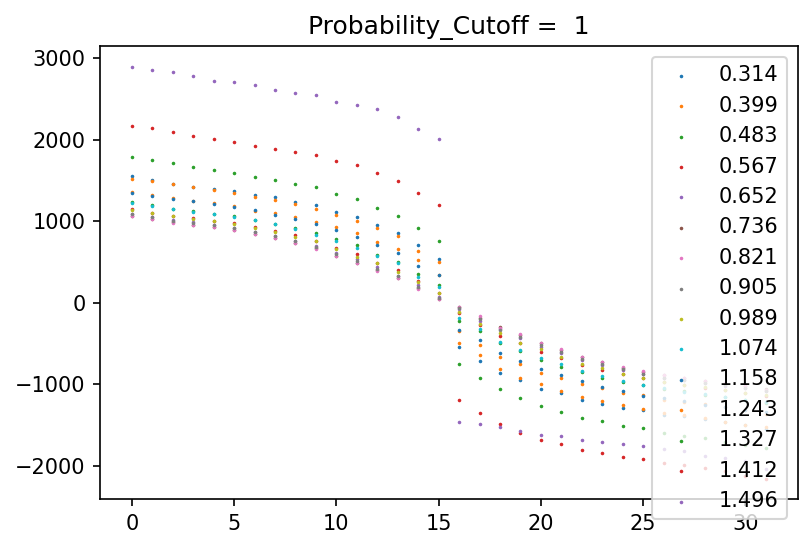

In [25]:
plt.figure(dpi = 150)
for n, i in enumerate(final_array):
    plt.scatter([i for i in range(2*strip_width)], i, s = 0.5, label = '%s' %round(theta_list[n],3))
plt.title("Probability_Cutoff =  %s" %(probability_cutoff))
plt.legend()

In [26]:
for i in final_array:
    print(sum(i))

-0.0037158441780320572
-8.086149819064303e-06
7.5145558184885886e-06
-3.536774556778255e-06
-4.48703758593183e-08
9.374298315378837e-08
1.9514800442266278e-07
-1.2828081707993988e-06
2.9502564302674728e-06
1.892916725410032e-05
-2.6148324650421273e-05
-0.0024271372346902353
-0.298817457221503
140.87972261035566
13293.57701962912
